<a href="https://colab.research.google.com/github/KwasiOwusuNY/malariaHotspot/blob/main/Capstone_malaria_with_Model_Training_and_CTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Dall-E Capstone/Dataset/malaria_final_version.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(path)
df.head()

Country Name  Year Country Code  \
0       Algeria  2007          DZA   
1        Angola  2007          AGO   
2         Benin  2007          BEN   
3      Botswana  2007          BWA   
4  Burkina Faso  2007          BFA   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Rural population (% of total population)  \
0                    26.0                                     34.65   
1               1533485.0                                     42.48   
2                     0.0                                     58.44   
3                   390.0                                     42.07   
4                 44246.0                                     77.00   

   Rural population growth (annual %)  \
0                               -0.60   
1                                1.91   
2                                1.99   
3                               -1.44   
4                                2.16   

   Urban population (% of total population)  \
0                                     65.35   
1                                     57.52   
2                                     41.56   
3                                     57.93   
4                                     23.00   

   Urban population growth (annual %)  \
0                                2.71   
1                                5.01   
2                                4.09   
3                                4.80   
4                                5.91   

   People using at least basic drinking water services (% of population)  \
0                                              91.68                       
1                                              47.96                       
2                                              63.78                       
3                                              78.89                       
4                                              52.27                       

   People using at least basic drinking water services, rural (% of rural population)  \
0                                              85.83                                    
1                                              23.77                                    
2                                              54.92                                    
3                                              57.60                                    
4                                              45.13                                    

   People using at least basic drinking water services, urban (% of urban population)  \
0                                              94.78                                    
1                                              65.83                                    
2                                              76.24                                    
3                                              94.35                                    
4                                              76.15                                    

   People using at least basic sanitation services (% of population)  \
0                                              85.85                   
1                                              37.26                   
2                                              11.80                   
3                                              61.60                   
4                                              15.60                   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94                                
1                                              14.00                                
2     

In [ ]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'geometry'],
      dtype='object')

In [ ]:
df.shape

(594, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int64  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 550 non-null    float64
 4   Malaria cases reported                                                              550 non-null    float64
 5   Rural population (% of total population)                                            588 non-null   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [ ]:
# Fill missing values in numerical columns with the median
missing_values_cols = ['Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude']
for col in missing_values_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing values in 'geometry' column
df.dropna(subset=['geometry'], inplace=True)

# Check for missing values again
print(df.isnull().sum())

Country Name                                                                          0
Year                                                                                  0
Country Code                                                                          0
Incidence of malaria (per 1,000 population at risk)                                   0
Malaria cases reported                                                                0
Rural population (% of total population)                                              0
Rural population growth (annual %)                                                    0
Urban population (% of total population)                                              0
Urban population growth (annual %)                                                    0
People using at least basic drinking water services (% of population)                 0
People using at least basic drinking water services, rural (% of rural population)    0
People using at least basic drin

In [ ]:
df['Incidence of malaria (per 1,000 population at risk)'].nunique()

500

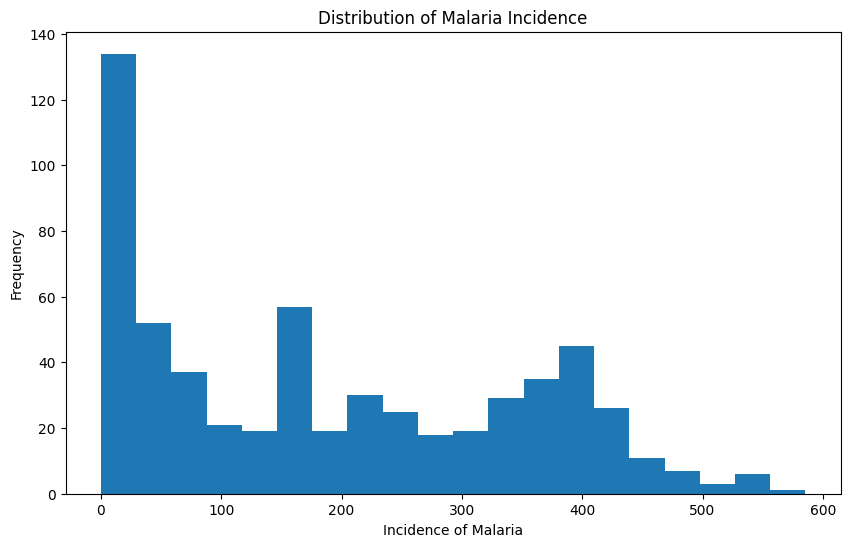

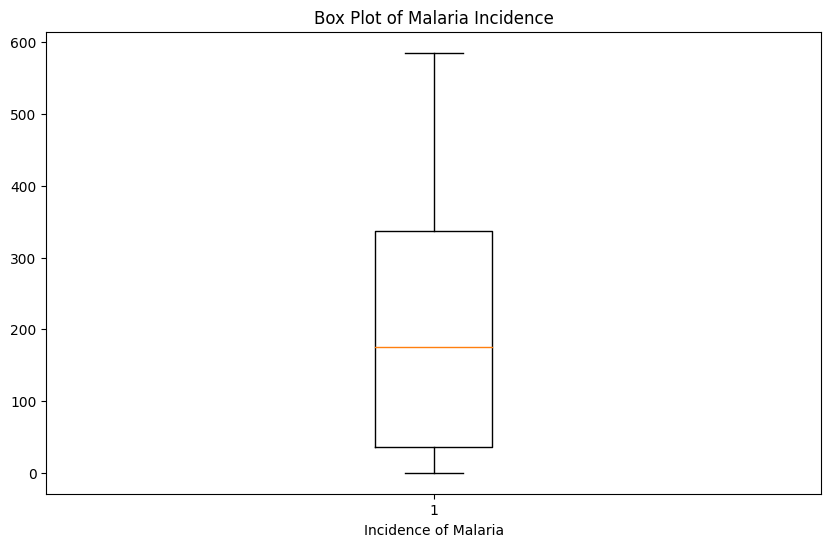

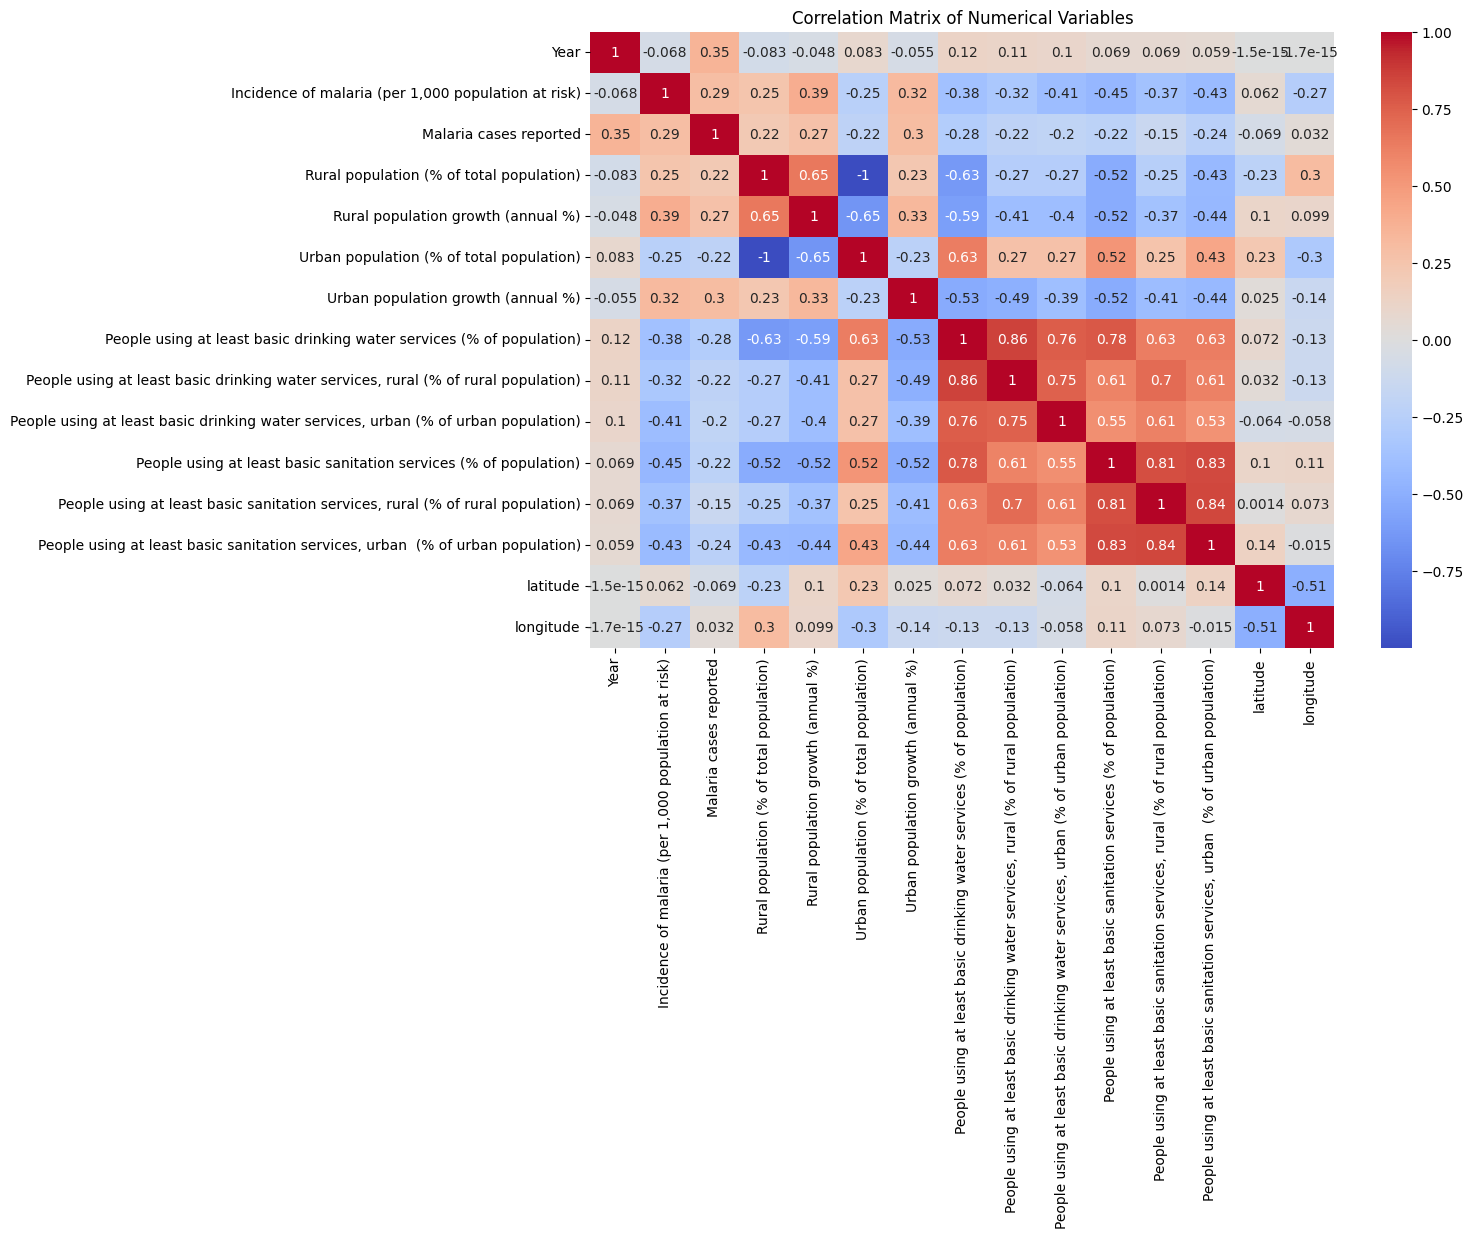

In [ ]:
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['Incidence of malaria (per 1,000 population at risk)'], bins=20)
plt.xlabel('Incidence of Malaria')
plt.ylabel('Frequency')
plt.title('Distribution of Malaria Incidence')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
plt.boxplot(df['Incidence of malaria (per 1,000 population at risk)'])
plt.xlabel('Incidence of Malaria')
plt.title('Box Plot of Malaria Incidence')
plt.show()

# Correlation Matrix
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


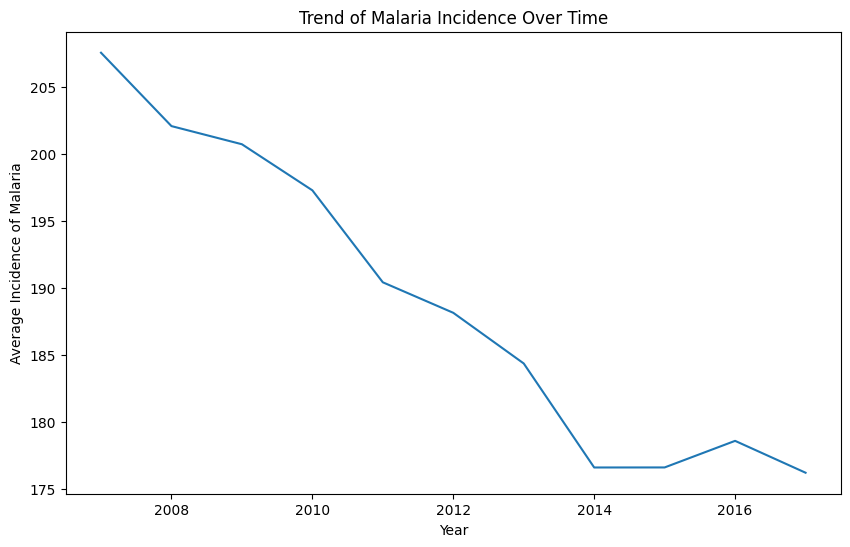

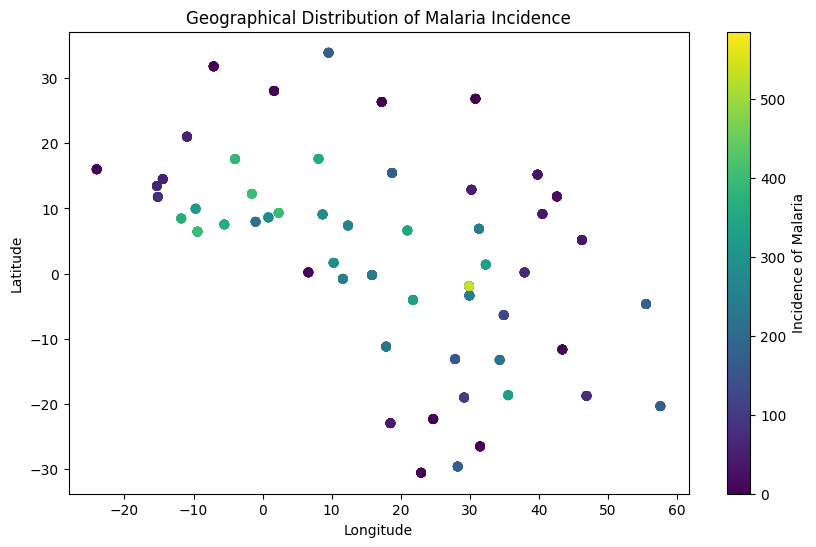

In [ ]:
# Temporal Analysis
# Group the data by year and calculate the average incidence of malaria
yearly_incidence = df.groupby('Year')['Incidence of malaria (per 1,000 population at risk)'].mean()

# Plot the trend of malaria incidence over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_incidence.index, yearly_incidence.values)
plt.xlabel('Year')
plt.ylabel('Average Incidence of Malaria')
plt.title('Trend of Malaria Incidence Over Time')
plt.show()

# Spatial Analysis
# Create a scatter plot to visualize the geographical distribution of malaria incidence
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Incidence of malaria (per 1,000 population at risk)'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Malaria Incidence')
plt.colorbar(label='Incidence of Malaria')
plt.show()

In [ ]:
pip install geopandas

In [ ]:
pip install basemap


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Spatial Analysis

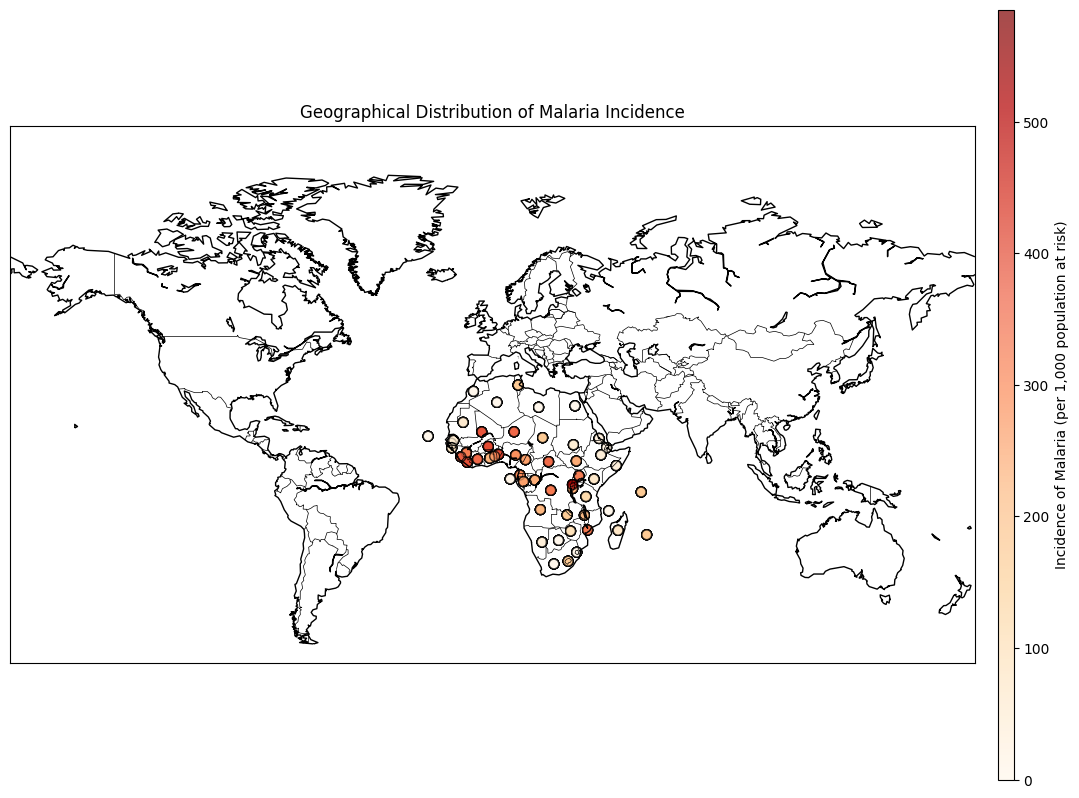

In [ ]:
# Load the data into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system to WGS84
gdf.crs = "EPSG:4326"

# Plotting malaria incidence on the world map using Basemap
fig, ax = plt.subplots(figsize=(15, 10))

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(gdf['longitude'].values, gdf['latitude'].values)

# Scatter plot of malaria incidence
sc = m.scatter(x, y, c=gdf['Incidence of malaria (per 1,000 population at risk)'], cmap='OrRd', s=50, edgecolor='k', alpha=0.7)

# Add color bar
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Incidence of Malaria (per 1,000 population at risk)')

# Add title
plt.title('Geographical Distribution of Malaria Incidence')
plt.show()

## Clustering Analysis

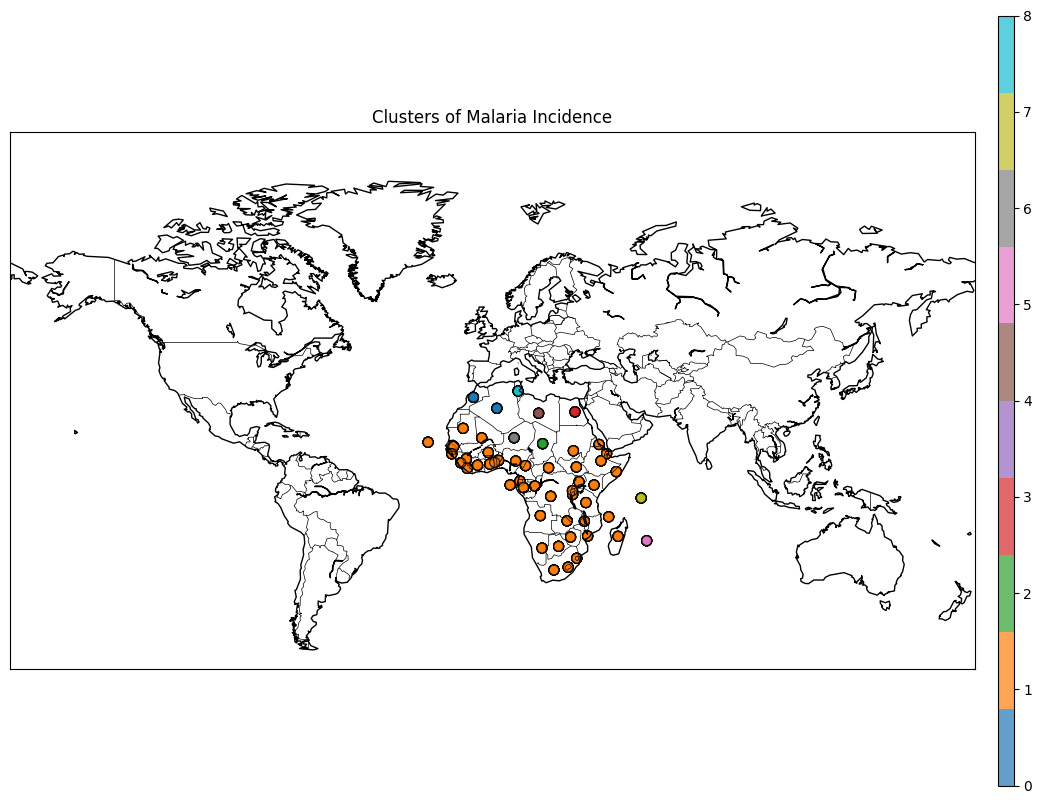

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

# Extract relevant data for clustering
coords = gdf[['latitude', 'longitude']].values
incidence = gdf['Incidence of malaria (per 1,000 population at risk)'].values

# Standardize the data
coords_scaled = (coords - coords.mean(axis=0)) / coords.std(axis=0)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=10).fit(coords_scaled)
labels = db.labels_

# Add cluster labels to GeoDataFrame
gdf['Cluster'] = labels

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(gdf['longitude'].values, gdf['latitude'].values)
sc = m.scatter(x, y, c=gdf['Cluster'], cmap='tab10', s=50, edgecolor='k', alpha=0.7)
plt.title('Clusters of Malaria Incidence')
plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
plt.show()

# Display the GeoDataFrame with cluster labels
#import ace_tools as tools; tools.display_dataframe_to_user(name="Malaria Incidence Clusters", dataframe=gdf)


## Predictive Model

In [ ]:
# Selecting relevant features and target variable for modeling
features = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude']

# Drop rows with missing values in both features and target variable
data = df[features + ['Incidence of malaria (per 1,000 population at risk)']].dropna()

# Separate features and target variable
X = data[features]
y = data['Incidence of malaria (per 1,000 population at risk)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1044.7853290929431, 0.952692332156144)

## Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

## Linear Regression

In [ ]:
#define target and feature variables
# Selecting relevant features and target variable for modeling
features = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude','Country Name','Year']

# Drop rows with missing values in both features and target variable
data = df[features + ['Incidence of malaria (per 1,000 population at risk)']].dropna()

# Separate features and target variable
X = data[features]
y = data['Incidence of malaria (per 1,000 population at risk)']

In [ ]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

155     32.29
550      3.97
132    113.80
450      0.51
287     16.15
        ...  
71       6.78
106    176.72
270      0.03
435      0.37
102    171.00
Name: Incidence of malaria (per 1,000 population at risk), Length: 475, dtype: float64

In [ ]:
numerical_cols = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude','Year']
categorical_cols = ['Country Name']

In [ ]:
# Initialize OneHotEncoder and StandardScaler
encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

In [ ]:
# One-hot encode the categorical column
encoded_columns = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Standard scale the numerical columns
scaled_numerical = scaler.fit_transform(X[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

In [ ]:
# Concatenate the processed numerical and categorical columns
X_processed = pd.concat([scaled_numerical_df, encoded_df], axis=1)
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 67 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            594 non-null    float64
 1   Rural population growth (annual %)                                                  594 non-null    float64
 2   Urban population (% of total population)                                            594 non-null    float64
 3   Urban population growth (annual %)                                                  594 non-null    float64
 4   People using at least basic drinking water services (% of population)               594 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  594 non-null   

In [ ]:
X = X_processed
X

Rural population (% of total population)  \
0                                   -1.234855   
1                                   -0.799375   
2                                    0.088270   
3                                   -0.822178   
4                                    1.120519   
..                                        ...   
589                                  0.110516   
590                                 -1.417835   
591                                  1.109395   
592                                  0.009294   
593                                  0.606619   

     Rural population growth (annual %)  \
0                             -1.670031   
1                              0.434005   
2                              0.501066   
3                             -2.374171   
4                              0.643570   
..                                  ...   
589                            0.157379   
590                           -0.999422   
591                            1.356093   
592                            0.517831   
593                            0.132231   

     Urban population (% of total population)  \
0                                    1.234825   
1                                    0.799340   
2                                   -0.088316   
3                                    0.822143   
4                                   -1.120577   
..                                        ...   
589                                 -0.110563   
590                                  1.417806   
591                                 -1.109453   
592                                 -0.009339   
593                                 -0.606671   

     Urban population growth (annual %)  \
0                             -0.563033   
1                              1.025600   
2                              0.390146   
3                              0.880551   
4                              1.647239   
..                                  ...   
589                            0.182933   
590                           -1.350443   
591                            1.882080   
592                            0.473032   
593                           -1.550749   

     People using at least basic drinking water services (% of population)  \
0                                             1.495789                       
1                                            -1.048750                       
2                                            -0.128013                       
3                                             0.751401                       
4                                            -0.797904                       
..                                                 ...                       
589                                          -0.049442                       
590                                           1.761766                       
591                                          -0.982401                       
592                                          -0.350340                       
593                                          -0.112299                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                             1.864888                                    
1                                            -1.496740                                    
2                                             0.190574                                    
3                                             0.335743                                    
4                                            -0.339724                                    
..                                                 ...                                    
589                                          -0.163139                                    
590                                           2.020890                                    
591                                  

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize the regression model
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
#fit the model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training data
lr_train_pred = lr.predict(X_train)
#doing a recall
lr_test_pred = lr.predict(X_test)
#lr_test_pred

## Model Performance
Here we are going to compare the actual value (y_train) versus the predicted value (y_lr_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating model for training data
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_pred)

print("Mean Squared Error(Train):", lr_train_mse)
print("R2 score(Train):", lr_train_r2)

# Evaluating model for testing data
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Mean Squared Error(Test):", lr_test_mse)
print("R2 score(Test):", lr_test_r2)


Mean Squared Error(Train): 1445.7856478834624
R2 score(Train): 0.9425724305442191
Mean Squared Error(Test): 1448.3540662385767
R2 score(Test): 0.934418821572276


In [ ]:
lr_results = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Train MSE': [lr_train_mse],
    'Train R2 Score': [lr_train_r2],
    'Test MSE': [lr_test_mse],
    'Test R2 Score': [lr_test_r2]
})
lr_results

Method    Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Linear Regression  1445.785648        0.942572  1448.354066       0.934419

## Random Forest Regression

In [ ]:
#Training the model
rf= RandomForestRegressor(max_depth = 2, random_state=100)  # You can adjust hyperparameters
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
#Make predictions on the training data
rf_train_pred = rf.predict(X_train)
#doing a recall
rf_test_pred = rf.predict(X_test)

In [ ]:
#Evaluating the model
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_r2 = r2_score(y_train, rf_train_pred)


print("Mean Squared Error(Train):", rf_train_mse)
print("R2 score(Train):", rf_train_r2)

# Evaluating model for training data
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print("Mean Squared Error(Test):", rf_test_mse)
print("R2 score(Test):", rf_test_r2)


Mean Squared Error(Train): 10947.518690262812
R2 score(Train): 0.5651572618154789
Mean Squared Error(Test): 12011.041688801964
R2 score(Test): 0.4561424678829864


In [ ]:
rf_results = pd.DataFrame({
    'Method': ['Random Forest Regression'],
    'Train MSE': [rf_train_mse],
    'Train R2 Score': [rf_train_r2],
    'Test MSE': [rf_test_mse],
    'Test R2 Score': [rf_test_r2]
})
rf_results

Method    Train MSE  Train R2 Score      Test MSE  \
0  Random Forest Regression  10947.51869        0.565157  12011.041689   

   Test R2 Score  
0       0.456142

## Support Vector Regression

In [ ]:
#defining the model
svr = SVR()
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

# Best model
best_svr = grid_search_svr.best_estimator_
best_svr

SVR(C=100, kernel='linear')

In [ ]:
# Make predictions on the test set using the best SVR model
y_pred_best_svr = best_svr.predict(X_test)
y_pred_train_svr = best_svr.predict(X_train)

In [ ]:
# Calculate performance metrics for the best SVR model
# Evaluating model for training data
svr_train_mse = mean_squared_error(y_train, y_pred_train_svr)
svr_train_r2 = r2_score(y_train, y_pred_train_svr)

#Evaluating model for test data
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)


# Print the results
print("Best SVR Model Performance:")
print("Mean Squared Error (Test):", mse_best_svr)
print("R-squared (Test):", r2_best_svr)
print("Mean Squared Error(Train):", svr_train_mse)
print("R2 score(Train):", svr_train_r2)

Best SVR Model Performance:
Mean Squared Error (Test): 1734.850232310059
R-squared (Test): 0.9214463332671284
Mean Squared Error(Train): 2070.034168825282
R2 score(Train): 0.9177768632714802


In [ ]:
svr_results = pd.DataFrame({
    'Method': ['Support Vector Regression'],
    'Train MSE': [svr_train_mse],
    'Train R2 Score': [svr_train_r2],
    'Test MSE': [mse_best_svr],
    'Test R2 Score': [r2_best_svr]
})
svr_results

Method    Train MSE  Train R2 Score     Test MSE  \
0  Support Vector Regression  2070.034169        0.917777  1734.850232   

   Test R2 Score  
0       0.921446

## Decision Tree

In [ ]:
# Define the model
dtr = DecisionTreeRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_dtr = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dtr.fit(X_train, y_train)

# Best model
best_dtr = grid_search_dtr.best_estimator_

In [ ]:
y_pred_best_dtr = best_dtr.predict(X_test)
y_pred_train_dtr = best_dtr.predict(X_train)

In [ ]:
# Evaluating model for training data
dtr_train_mse = mean_squared_error(y_train, y_pred_train_dtr)
dtr_train_r2 = r2_score(y_train, y_pred_train_dtr)



# Calculate performance metrics for the best Decision Tree Regressor model
mse_best_dtr = mean_squared_error(y_test, y_pred_best_dtr)
r2_best_dtr = r2_score(y_test, y_pred_best_dtr)

# Print the results
print("Decision Tree Regressor Model Performance:")
print("Mean Squared Error (MSE):", mse_best_dtr)
print("R-squared (R²):", r2_best_dtr)
print("Mean Squared Error(Train):", dtr_train_mse)
print("R2 score(Train):", dtr_train_r2)

Decision Tree Regressor Model Performance:
Mean Squared Error (MSE): 1994.5298974789919
R-squared (R²): 0.9096880906851035
Mean Squared Error(Train): 2.891050660649973e-29
R2 score(Train): 1.0


In [ ]:
dtr_results = pd.DataFrame({
    'Method': ['Decision Tree'],
    'Train MSE': [dtr_train_mse],
    'Train R2 Score': [dtr_train_r2],
    'Test MSE': [mse_best_dtr],
    'Test R2 Score': [r2_best_dtr]
})
dtr_results

Method     Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Decision Tree  2.891051e-29             1.0  1994.529897       0.909688

## Elastic Net

In [ ]:
# Define the model
elasticnet = ElasticNet()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}

# Perform grid search
grid_search_en = GridSearchCV(elasticnet, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_en.fit(X_train, y_train)

# Best model
best_en = grid_search_en.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+03, tolerance: 9.742e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+03, tolerance: 9.630e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e+03, tolerance: 9.437e

In [ ]:
y_pred_best_en = best_en.predict(X_test)
y_pred_train_en = best_en.predict(X_train)

In [ ]:
# Calculate performance metrics for the best ElasticNet model
mse_best_en = mean_squared_error(y_test, y_pred_best_en)
r2_best_en = r2_score(y_test, y_pred_best_en)

#Evaluate training data
en_train_mse = mean_squared_error(y_train, y_pred_train_en)
en_train_r2 = r2_score(y_train, y_pred_train_en)


# Print the results
print("ElasticNet Model Performance:")
print("Mean Squared Error (MSE):", mse_best_en)
print("R-squared (R²):", r2_best_en)
print("Mean Squared Error(Train):", en_train_mse)
print("R2 score(Train):", en_train_r2)

ElasticNet Model Performance:
Mean Squared Error (MSE): 1631.4172720789159
R-squared (R²): 0.9261297567326645
Mean Squared Error(Train): 1724.4211379216272
R2 score(Train): 0.9315048431875199


In [ ]:
en_results = pd.DataFrame({
    'Method': ['Elastic Net'],
    'Train MSE': [en_train_mse],
    'Train R2 Score': [en_train_r2],
    'Test MSE': [mse_best_en],
    'Test R2 Score': [r2_best_en]
})
en_results

Method    Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Elastic Net  1724.421138        0.931505  1631.417272        0.92613

## Model Comparisons

In [ ]:
df_models = pd.concat([lr_results,rf_results,svr_results,dtr_results,en_results], axis = 0)
df_models

Method     Train MSE  Train R2 Score      Test MSE  \
0          Linear Regression  1.445786e+03        0.942572   1448.354066   
0   Random Forest Regression  1.094752e+04        0.565157  12011.041689   
0  Support Vector Regression  2.070034e+03        0.917777   1734.850232   
0              Decision Tree  2.891051e-29        1.000000   1994.529897   
0                Elastic Net  1.724421e+03        0.931505   1631.417272   

   Test R2 Score  
0       0.934419  
0       0.456142  
0       0.921446  
0       0.909688  
0       0.926130

In [ ]:
df_models.reset_index(drop = True)

Method     Train MSE  Train R2 Score      Test MSE  \
0          Linear Regression  1.445786e+03        0.942572   1448.354066   
1   Random Forest Regression  1.094752e+04        0.565157  12011.041689   
2  Support Vector Regression  2.070034e+03        0.917777   1734.850232   
3              Decision Tree  2.891051e-29        1.000000   1994.529897   
4                Elastic Net  1.724421e+03        0.931505   1631.417272   

   Test R2 Score  
0       0.934419  
1       0.456142  
2       0.921446  
3       0.909688  
4       0.926130

In [ ]:
# Pruning the Decision Tree to reduce overfitting
pruned_dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4)
pruned_dtr.fit(X_train, y_train)
y_pred_pruned_dtr = pruned_dtr.predict(X_test)
mse_pruned_dtr = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr)
print("R-squared (R²):", r2_pruned_dtr)

# Compare with Linear Regression and ElasticNet
print("Model Comparison:")
print("Linear Regression - R2:", 0.849779)
print("ElasticNet - R2:", 0.849809)
print("Pruned Decision Tree - R2:", r2_pruned_dtr)


Pruned Decision Tree Performance:
Mean Squared Error (MSE): 2102.411716469995
R-squared (R²): 0.9048032237970431
Model Comparison:
Linear Regression - R2: 0.849779
ElasticNet - R2: 0.849809
Pruned Decision Tree - R2: 0.9048032237970431


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and the pruned decision tree
pruned_dtr_pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4))
pruned_dtr_pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_pruned_dtr = pruned_dtr_pipeline.predict(X_test)
mse_pruned_dtr = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree with Scaling Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr)
print("R-squared (R²):", r2_pruned_dtr)

Pruned Decision Tree with Scaling Performance:
Mean Squared Error (MSE): 2188.066622222354
R-squared (R²): 0.9009247870333422


# Feature Importance

In [ ]:

# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Predicting Malaria Incidence')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df


ValueError: All arrays must be of the same length

# CTGAN

In [ ]:
!pip install ctgan
!pip install table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 982.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux

In [ ]:
from ctgan import CTGAN
from table_evaluator import TableEvaluator

In [ ]:
data_train = X_train.copy()
data_train['Incidence of malaria (per 1,000 population at risk)'] = y_train

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 155 to 102
Data columns (total 68 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            475 non-null    float64
 1   Rural population growth (annual %)                                                  475 non-null    float64
 2   Urban population (% of total population)                                            475 non-null    float64
 3   Urban population growth (annual %)                                                  475 non-null    float64
 4   People using at least basic drinking water services (% of population)               475 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  475 non-null    fl

In [ ]:
# Treat the encoded columns as categorical columns to make sure the generated data is only 0s and 1s
categorical_features = ['Country Name_Algeria', 'Country Name_Angola', 'Country Name_Benin', 'Country Name_Botswana',
                        'Country Name_Burkina Faso', 'Country Name_Burundi', 'Country Name_Cabo Verde', 'Country Name_Cameroon',
                        'Country Name_Central African Republic', 'Country Name_Chad', 'Country Name_Comoros', 'Country Name_Congo, Dem. Rep.',
                        'Country Name_Congo, Rep.', "Country Name_Cote d'Ivoire", 'Country Name_Djibouti', 'Country Name_Egypt, Arab Rep.',
                        'Country Name_Equatorial Guinea', 'Country Name_Eritrea', 'Country Name_Eswatini', 'Country Name_Ethiopia', 'Country Name_Gabon', 'Country Name_Gambia, The', 'Country Name_Ghana',
                        'Country Name_Guinea', 'Country Name_Guinea-Bissau', 'Country Name_Kenya', 'Country Name_Lesotho',
                        'Country Name_Liberia', 'Country Name_Libya', 'Country Name_Madagascar', 'Country Name_Malawi', 'Country Name_Mali',
                        'Country Name_Mauritania', 'Country Name_Mauritius', 'Country Name_Morocco', 'Country Name_Mozambique', 'Country Name_Namibia',
                        'Country Name_Niger', 'Country Name_Nigeria', 'Country Name_Rwanda', 'Country Name_Sao Tome and Principe', 'Country Name_Senegal',
                        'Country Name_Seychelles', 'Country Name_Sierra Leone', 'Country Name_Somalia', 'Country Name_South Africa', 'Country Name_South Sudan',
                        'Country Name_Sudan', 'Country Name_Tanzania', 'Country Name_Togo', 'Country Name_Tunisia', 'Country Name_Uganda', 'Country Name_Zambia', 'Country Name_Zimbabwe']

In [ ]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data_train, categorical_features, epochs = 100)

Gen. (-2.89) | Discrim. (0.11): 100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


In [ ]:
synth_data = ctgan.sample(200)

In [ ]:
print(data_train.shape, synth_data.shape)
table_evaluator =  TableEvaluator(data_train, synth_data, cat_cols= categorical_features)

(475, 68) (200, 68)


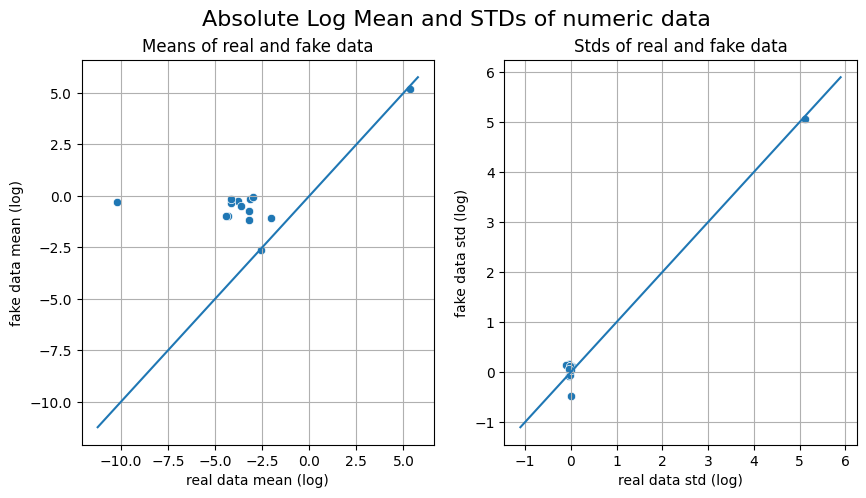

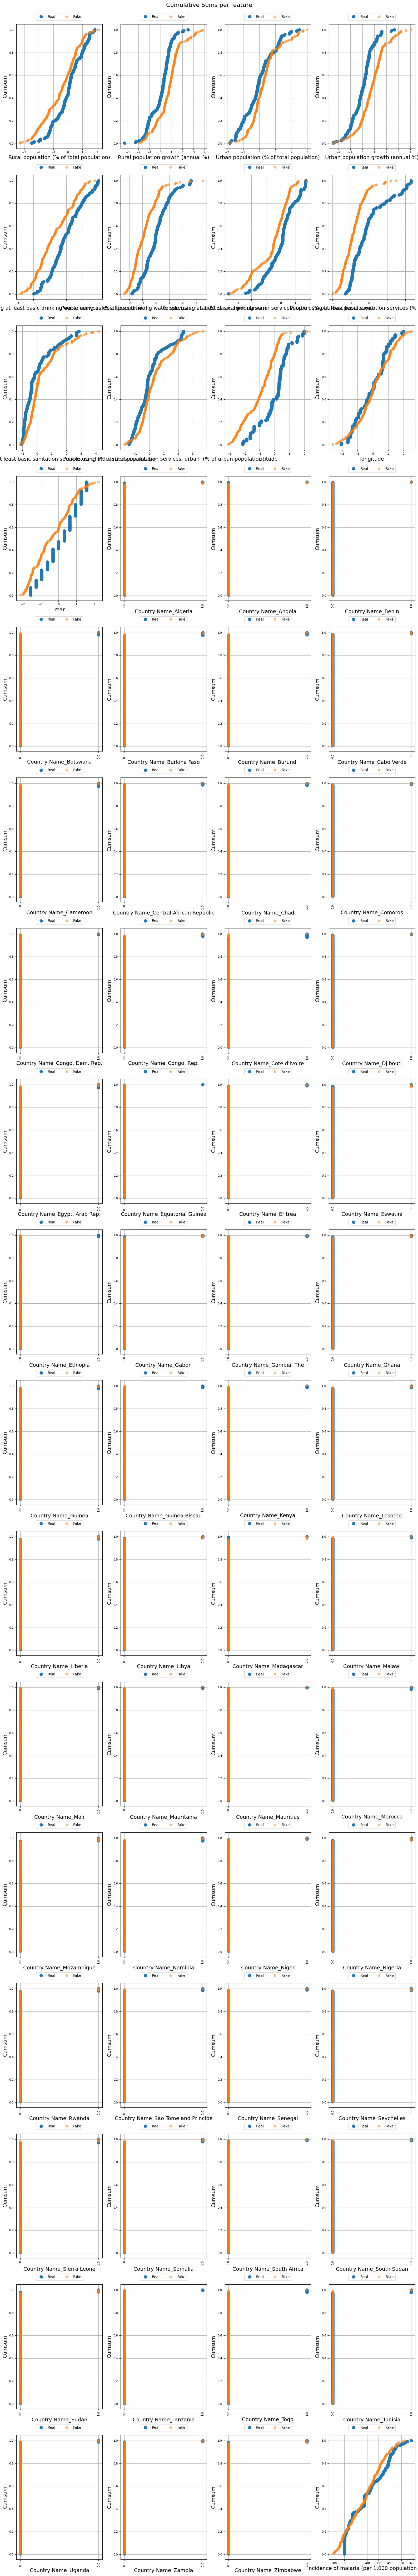

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

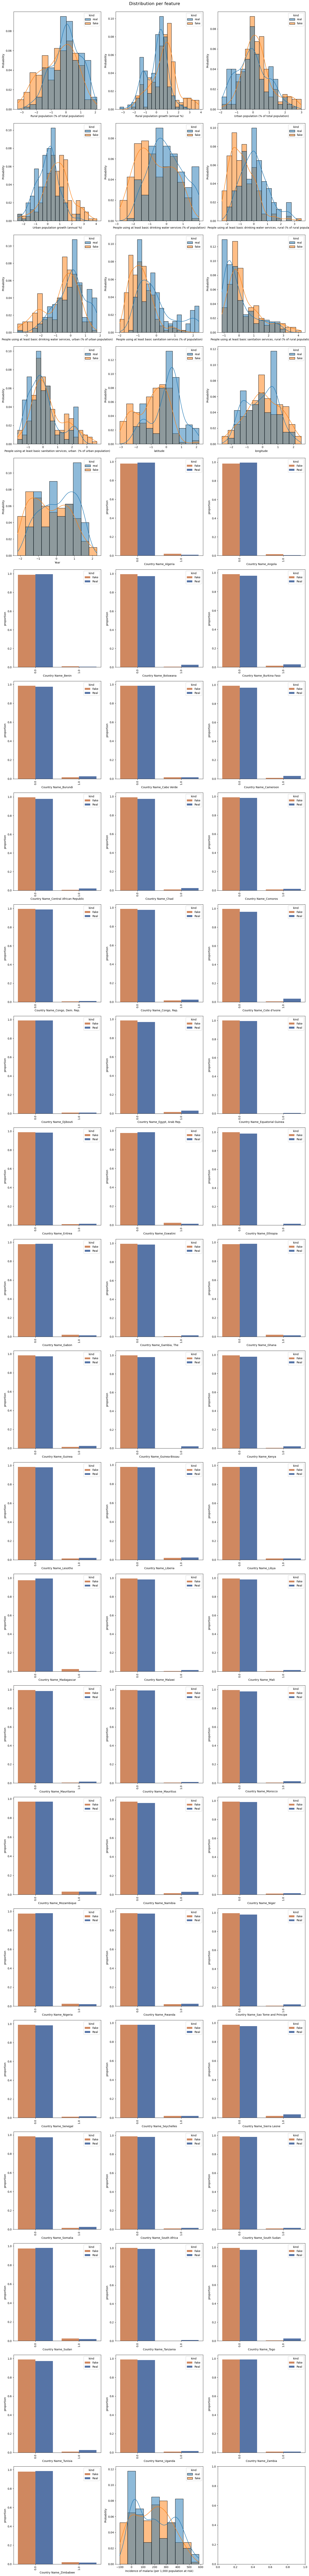

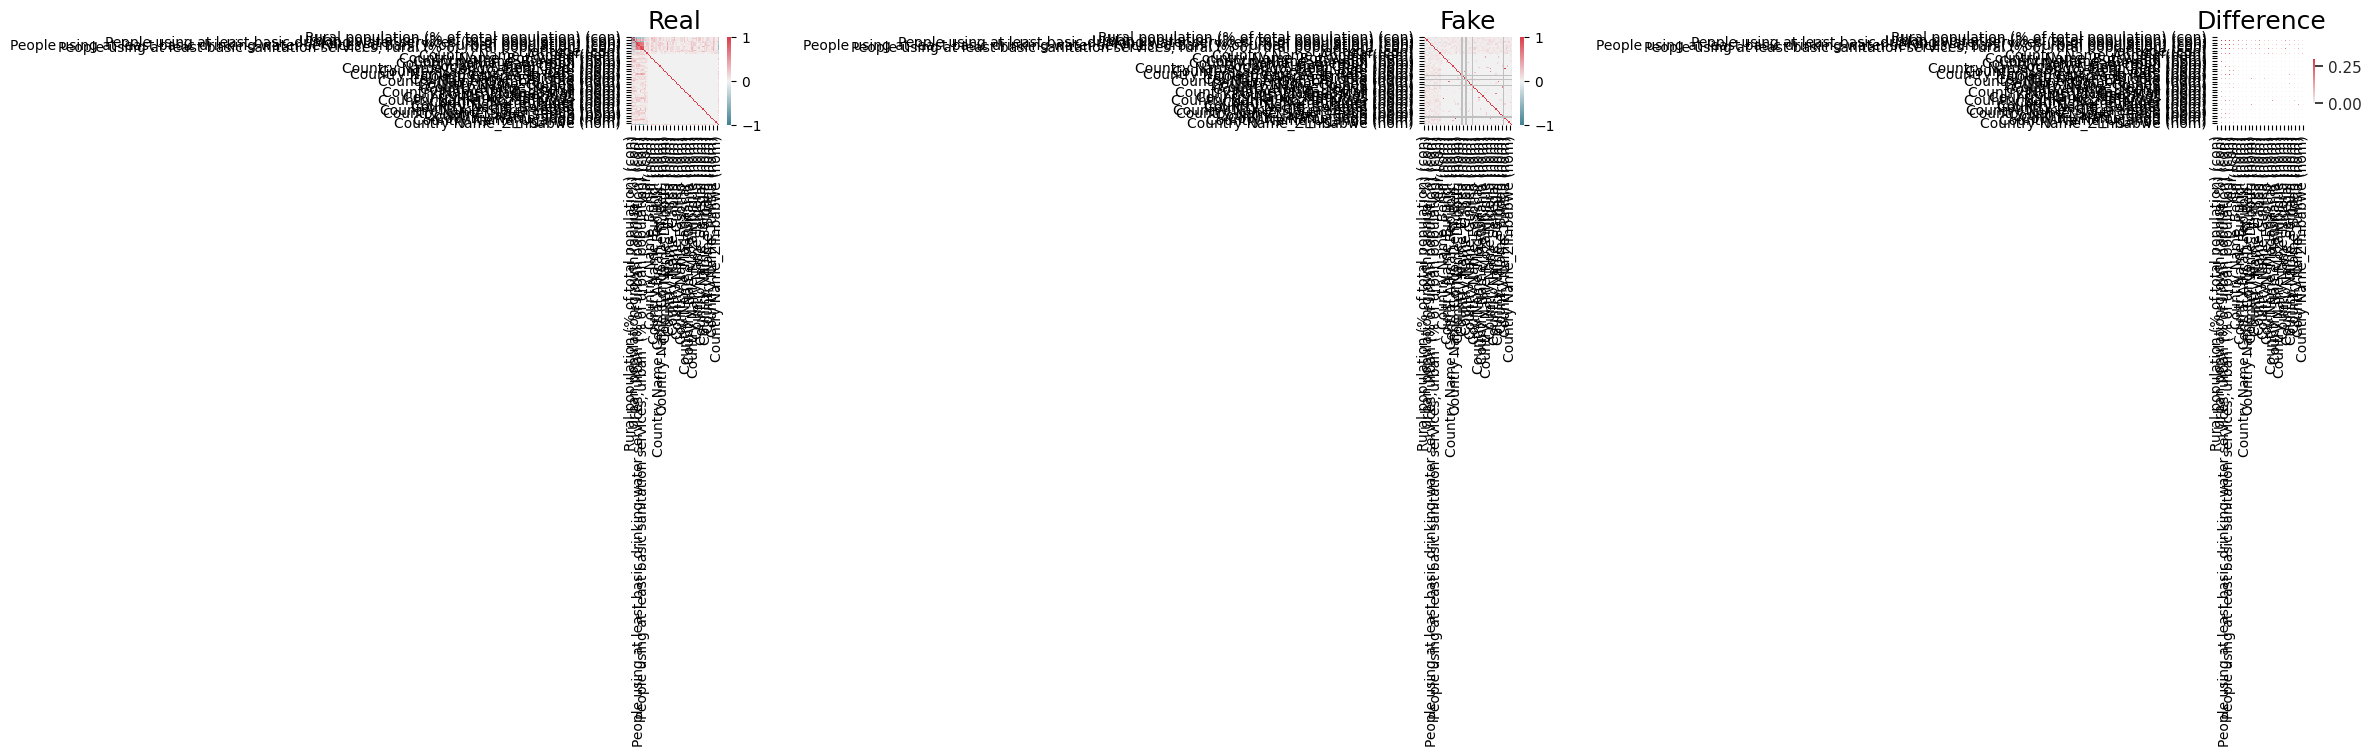

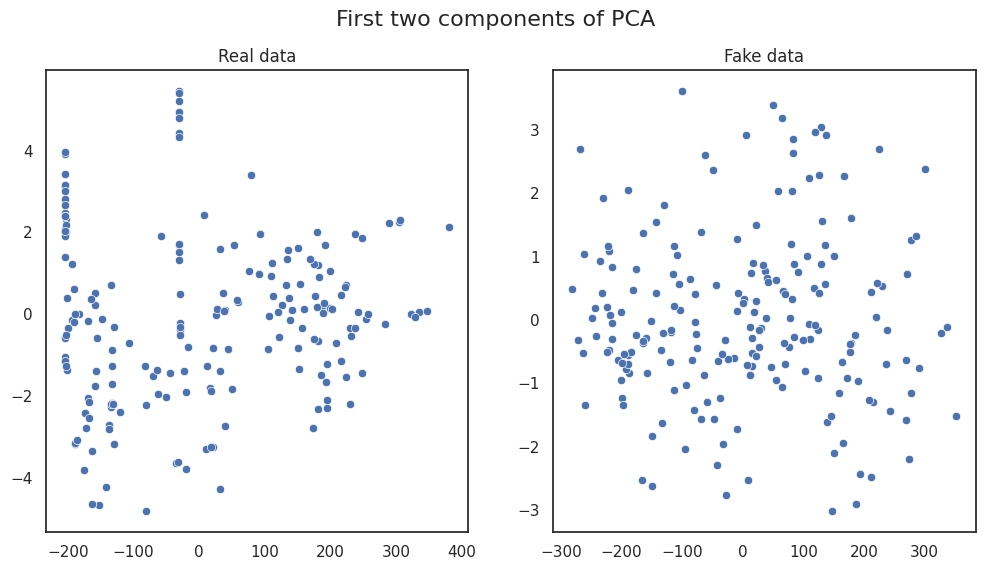

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
synth_data.describe()

Rural population (% of total population)  \
count                                200.000000   
mean                                  -0.484952   
std                                    1.175748   
min                                   -3.277566   
25%                                   -1.400780   
50%                                   -0.364158   
75%                                    0.397413   
max                                    2.106679   

       Rural population growth (annual %)  \
count                          200.000000   
mean                             0.730463   
std                              1.171324   
min                             -1.930967   
25%                              0.070414   
50%                              0.801513   
75%                              1.320403   
max                              3.838179   

       Urban population (% of total population)  \
count                                200.000000   
mean                                   0.310157   
std                                    0.922337   
min                                   -1.918072   
25%                                   -0.270420   
50%                                    0.212880   
75%                                    0.702270   
max                                    2.984212   

       Urban population growth (annual %)  \
count                          200.000000   
mean                             0.780887   
std                              1.143573   
min                             -2.480649   
25%                              0.092464   
50%                              0.780359   
75%                              1.429340   
max                              4.066880   

       People using at least basic drinking water services (% of population)  \
count                                         200.000000                       
mean                                           -0.693319                       
std                                             1.087965                       
min                                            -2.812615                       
25%                                            -1.539055                       
50%                                            -0.856406                       
75%                                             0.187613                       
max                                             1.756945                       

       People using at least basic drinking water services, rural (% of rural population)  \
count                                         200.000000                                    
mean                                           -0.844778                                    
std                                             0.947021                                    
min                                            -2.351735                                    
25%                                            -1.539060                                    
50%                                            -0.951562                                    
75%                                            -0.247560                                    
max                                             3.495190                                    

       People using at least basic drinking water services, urban (% of urban population)  \
count                                         200.000000                                    
mean                                           -0.608233                                    
std                                             1.133969                                    
min                                            -3.476408                                    
25%                                            -1.397618                                    
50%                                            -0.359623                                    
75%                                             0.214789         

In [ ]:
# Merge the real and generated data to create a new train dataset
merged_train = pd.concat([data_train, synth_data], ignore_index=True)

In [ ]:
merged_train

Rural population (% of total population)  \
0                                    0.564906   
1                                    0.799053   
2                                    0.190605   
3                                    1.103833   
4                                    0.088548   
..                                        ...   
670                                 -0.853250   
671                                  0.487881   
672                                 -1.276880   
673                                 -2.540611   
674                                 -0.397688   

     Rural population growth (annual %)  \
0                              0.551362   
1                              0.542979   
2                              0.408857   
3                             -0.647352   
4                              0.237013   
..                                  ...   
670                            0.956395   
671                            0.504582   
672                           -1.307593   
673                            0.761915   
674                            0.360860   

     Urban population (% of total population)  \
0                                   -0.564958   
1                                   -0.799107   
2                                   -0.190652   
3                                   -1.103891   
4                                   -0.088316   
..                                        ...   
670                                  1.349600   
671                                 -0.098462   
672                                  2.242588   
673                                  1.070530   
674                                  2.984212   

     Urban population growth (annual %)  \
0                             -0.784060   
1                             -0.466334   
2                             -0.010465   
3                             -1.419514   
4                              0.141491   
..                                  ...   
670                           -0.137638   
671                           -0.226352   
672                            3.009568   
673                           -1.963849   
674                           -0.169905   

     People using at least basic drinking water services (% of population)  \
0                                            -0.903248                       
1                                             0.825898                       
2                                            -0.296214                       
3                                             0.114102                       
4                                            -0.910814                       
..                                                 ...                       
670                                          -2.420757                       
671                                          -0.757464                       
672                                          -1.183776                       
673                                           0.232902                       
674                                           0.452734                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            -0.468101                                    
1                                             1.381715                                    
2                                            -0.166930                                    
3                                             0.431619                                    
4                                            -1.278445                                    
..                                                 ...                                    
670                                          -0.956047                                    
671                                          -1.584612                                    
672                                  

In [ ]:
# Shuffle the dataset
merged_train = merged_train.sample(frac = 1).reset_index(drop=True)
merged_train

Rural population (% of total population)  \
0                                    0.014299   
1                                   -0.367232   
2                                    0.983281   
3                                    1.807943   
4                                   -0.764337   
..                                        ...   
670                                 -2.257649   
671                                 -1.412050   
672                                  1.048773   
673                                  0.190605   
674                                  0.559824   

     Rural population growth (annual %)  \
0                              0.811223   
1                              0.132231   
2                              2.790886   
3                              1.314179   
4                             -1.267666   
..                                  ...   
670                           -1.929892   
671                            0.906494   
672                           -1.586205   
673                            0.408857   
674                            0.954548   

     Urban population (% of total population)  \
0                                   -0.014344   
1                                    0.367192   
2                                    0.083546   
3                                   -1.808009   
4                                    0.764301   
..                                        ...   
670                                  2.257631   
671                                  1.234530   
672                                 -1.048830   
673                                 -0.190652   
674                                  0.481850   

     Urban population growth (annual %)  \
0                             -0.956738   
1                              0.300354   
2                              0.781101   
3                              1.564353   
4                             -0.915295   
..                                  ...   
670                            0.106955   
671                            2.705981   
672                           -0.901481   
673                           -0.010465   
674                            1.681938   

     People using at least basic drinking water services (% of population)  \
0                                             1.911342                       
1                                            -0.342774                       
2                                             1.147343                       
3                                            -0.550551                       
4                                             0.480767                       
..                                                 ...                       
670                                           0.990606                       
671                                          -0.936003                       
672                                           0.109446                       
673                                          -0.296214                       
674                                          -1.532416                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                             2.541439                                    
1                                            -0.679895                                    
2                                            -1.571239                                    
3                                             0.083323                                    
4                                            -0.194556                                    
..                                                 ...                                    
670                                          -0.296932                                    
671                                          -2.066908                                    
672                                  

In [ ]:
merged_train.columns

Index(['Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'Year', 'Country Name_Algeria',
       'Country Name_Angola', 'Country Name_Benin', 'Country Name_Botswana',
       'Country Name_Burkina Faso', 'Country Name_Burundi',
       'Country Name_Cabo Verde', 'Country Name_Cameroon',
       'Country Name_Centra

In [ ]:
merged_train['Incidence of malaria (per 1,000 population at risk)']

0        0.000000
1      386.680000
2      400.362235
3      210.200000
4        0.000000
          ...    
670    110.660000
671     76.312710
672    174.775000
673    113.800000
674     65.034972
Name: Incidence of malaria (per 1,000 population at risk), Length: 675, dtype: float64

In [ ]:
X_merged_train = merged_train.drop(columns=['Incidence of malaria (per 1,000 population at risk)'])
y_merged_train = merged_train['Incidence of malaria (per 1,000 population at risk)']

In [ ]:
# Retrain pruned decision tree with merged data
pruned_dtr_pipeline.fit(X_merged_train, y_merged_train)

# Make predictions and evaluate
y_pred_pruned_dtr = pruned_dtr_pipeline.predict(X_test)
mse_pruned_dtr_2 = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr_2 = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree Trained on Real and Synthetic Data with Scaling Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr_2)
print("R-squared (R²):", r2_pruned_dtr_2)

Pruned Decision Tree Trained on Real and Synthetic Data with Scaling Performance:
Mean Squared Error (MSE): 4365.970784874864
R-squared (R²): 0.8023097281753033


In [ ]:
# Compare error scores of the model when trained on real and merged data
scores = [['Real Data', mse_pruned_dtr, r2_pruned_dtr], ['Real and Synthetic Data',mse_pruned_dtr_2, r2_pruned_dtr_2]]
scores_df = pd.DataFrame(scores, columns=['Pruned Decision Tree model Draining Data', 'Mean Squared Error (MSE)', 'R-squared (R²)'])
scores_df

Pruned Decision Tree model Draining Data  Mean Squared Error (MSE)  \
0                                Real Data               2188.066622   
1                  Real and Synthetic Data               4365.970785   

   R-squared (R²)  
0        0.900925  
1        0.802310

## Predicting Countries

In [ ]:
data

Rural population (% of total population)  \
0                                       34.65   
1                                       42.48   
2                                       58.44   
3                                       42.07   
4                                       77.00   
..                                        ...   
589                                     58.84   
590                                     31.36   
591                                     76.80   
592                                     57.02   
593                                     67.76   

     Rural population growth (annual %)  \
0                                 -0.60   
1                                  1.91   
2                                  1.99   
3                                 -1.44   
4                                  2.16   
..                                  ...   
589                                1.58   
590                                0.20   
591                                3.01   
592                                2.01   
593                                1.55   

     Urban population (% of total population)  \
0                                       65.35   
1                                       57.52   
2                                       41.56   
3                                       57.93   
4                                       23.00   
..                                        ...   
589                                     41.16   
590                                     68.64   
591                                     23.20   
592                                     42.98   
593                                     32.24   

     Urban population growth (annual %)  \
0                                  2.71   
1                                  5.01   
2                                  4.09   
3                                  4.80   
4                                  5.91   
..                                  ...   
589                                3.79   
590                                1.57   
591                                6.25   
592                                4.21   
593                                1.28   

     People using at least basic drinking water services (% of population)  \
0                                                91.68                       
1                                                47.96                       
2                                                63.78                       
3                                                78.89                       
4                                                52.27                       
..                                                 ...                       
589                                              65.13                       
590                                              96.25                       
591                                              49.10                       
592                                              59.96                       
593                                              64.05                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                                85.83                                    
1                                                23.77                                    
2                                                54.92                                    
3                                                57.60                                    
4                                                45.13                                    
..                                                 ...                                    
589                                              48.39                                    
590                                              88.71                                    
591                                  

In [ ]:
X = data.drop(columns=['latitude', 'longitude', 'Country Name'])
y = data['Country Name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data_train = X_train.copy()
data_train['Country Name'] = y_train

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 155 to 102
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            475 non-null    float64
 1   Rural population growth (annual %)                                                  475 non-null    float64
 2   Urban population (% of total population)                                            475 non-null    float64
 3   Urban population growth (annual %)                                                  475 non-null    float64
 4   People using at least basic drinking water services (% of population)               475 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  475 non-null    fl

In [ ]:
categorical_features=['Country Name']

In [ ]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data_train, categorical_features, epochs = 200)

Gen. (2.53) | Discrim. (0.04): 100%|██████████| 200/200 [00:25<00:00,  7.77it/s]


In [ ]:
synth_data = ctgan.sample(200)

In [ ]:
print(data_train.shape, synth_data.shape)
table_evaluator =  TableEvaluator(data_train, synth_data, cat_cols= categorical_features)

(475, 13) (200, 13)


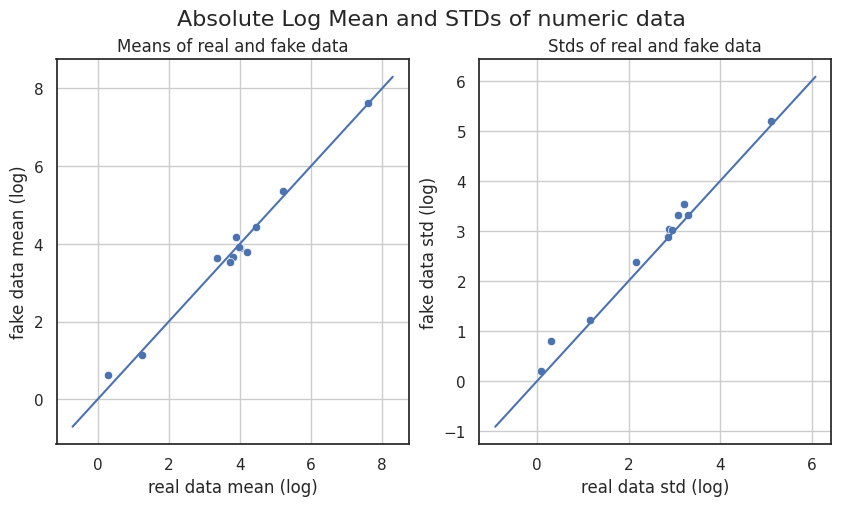

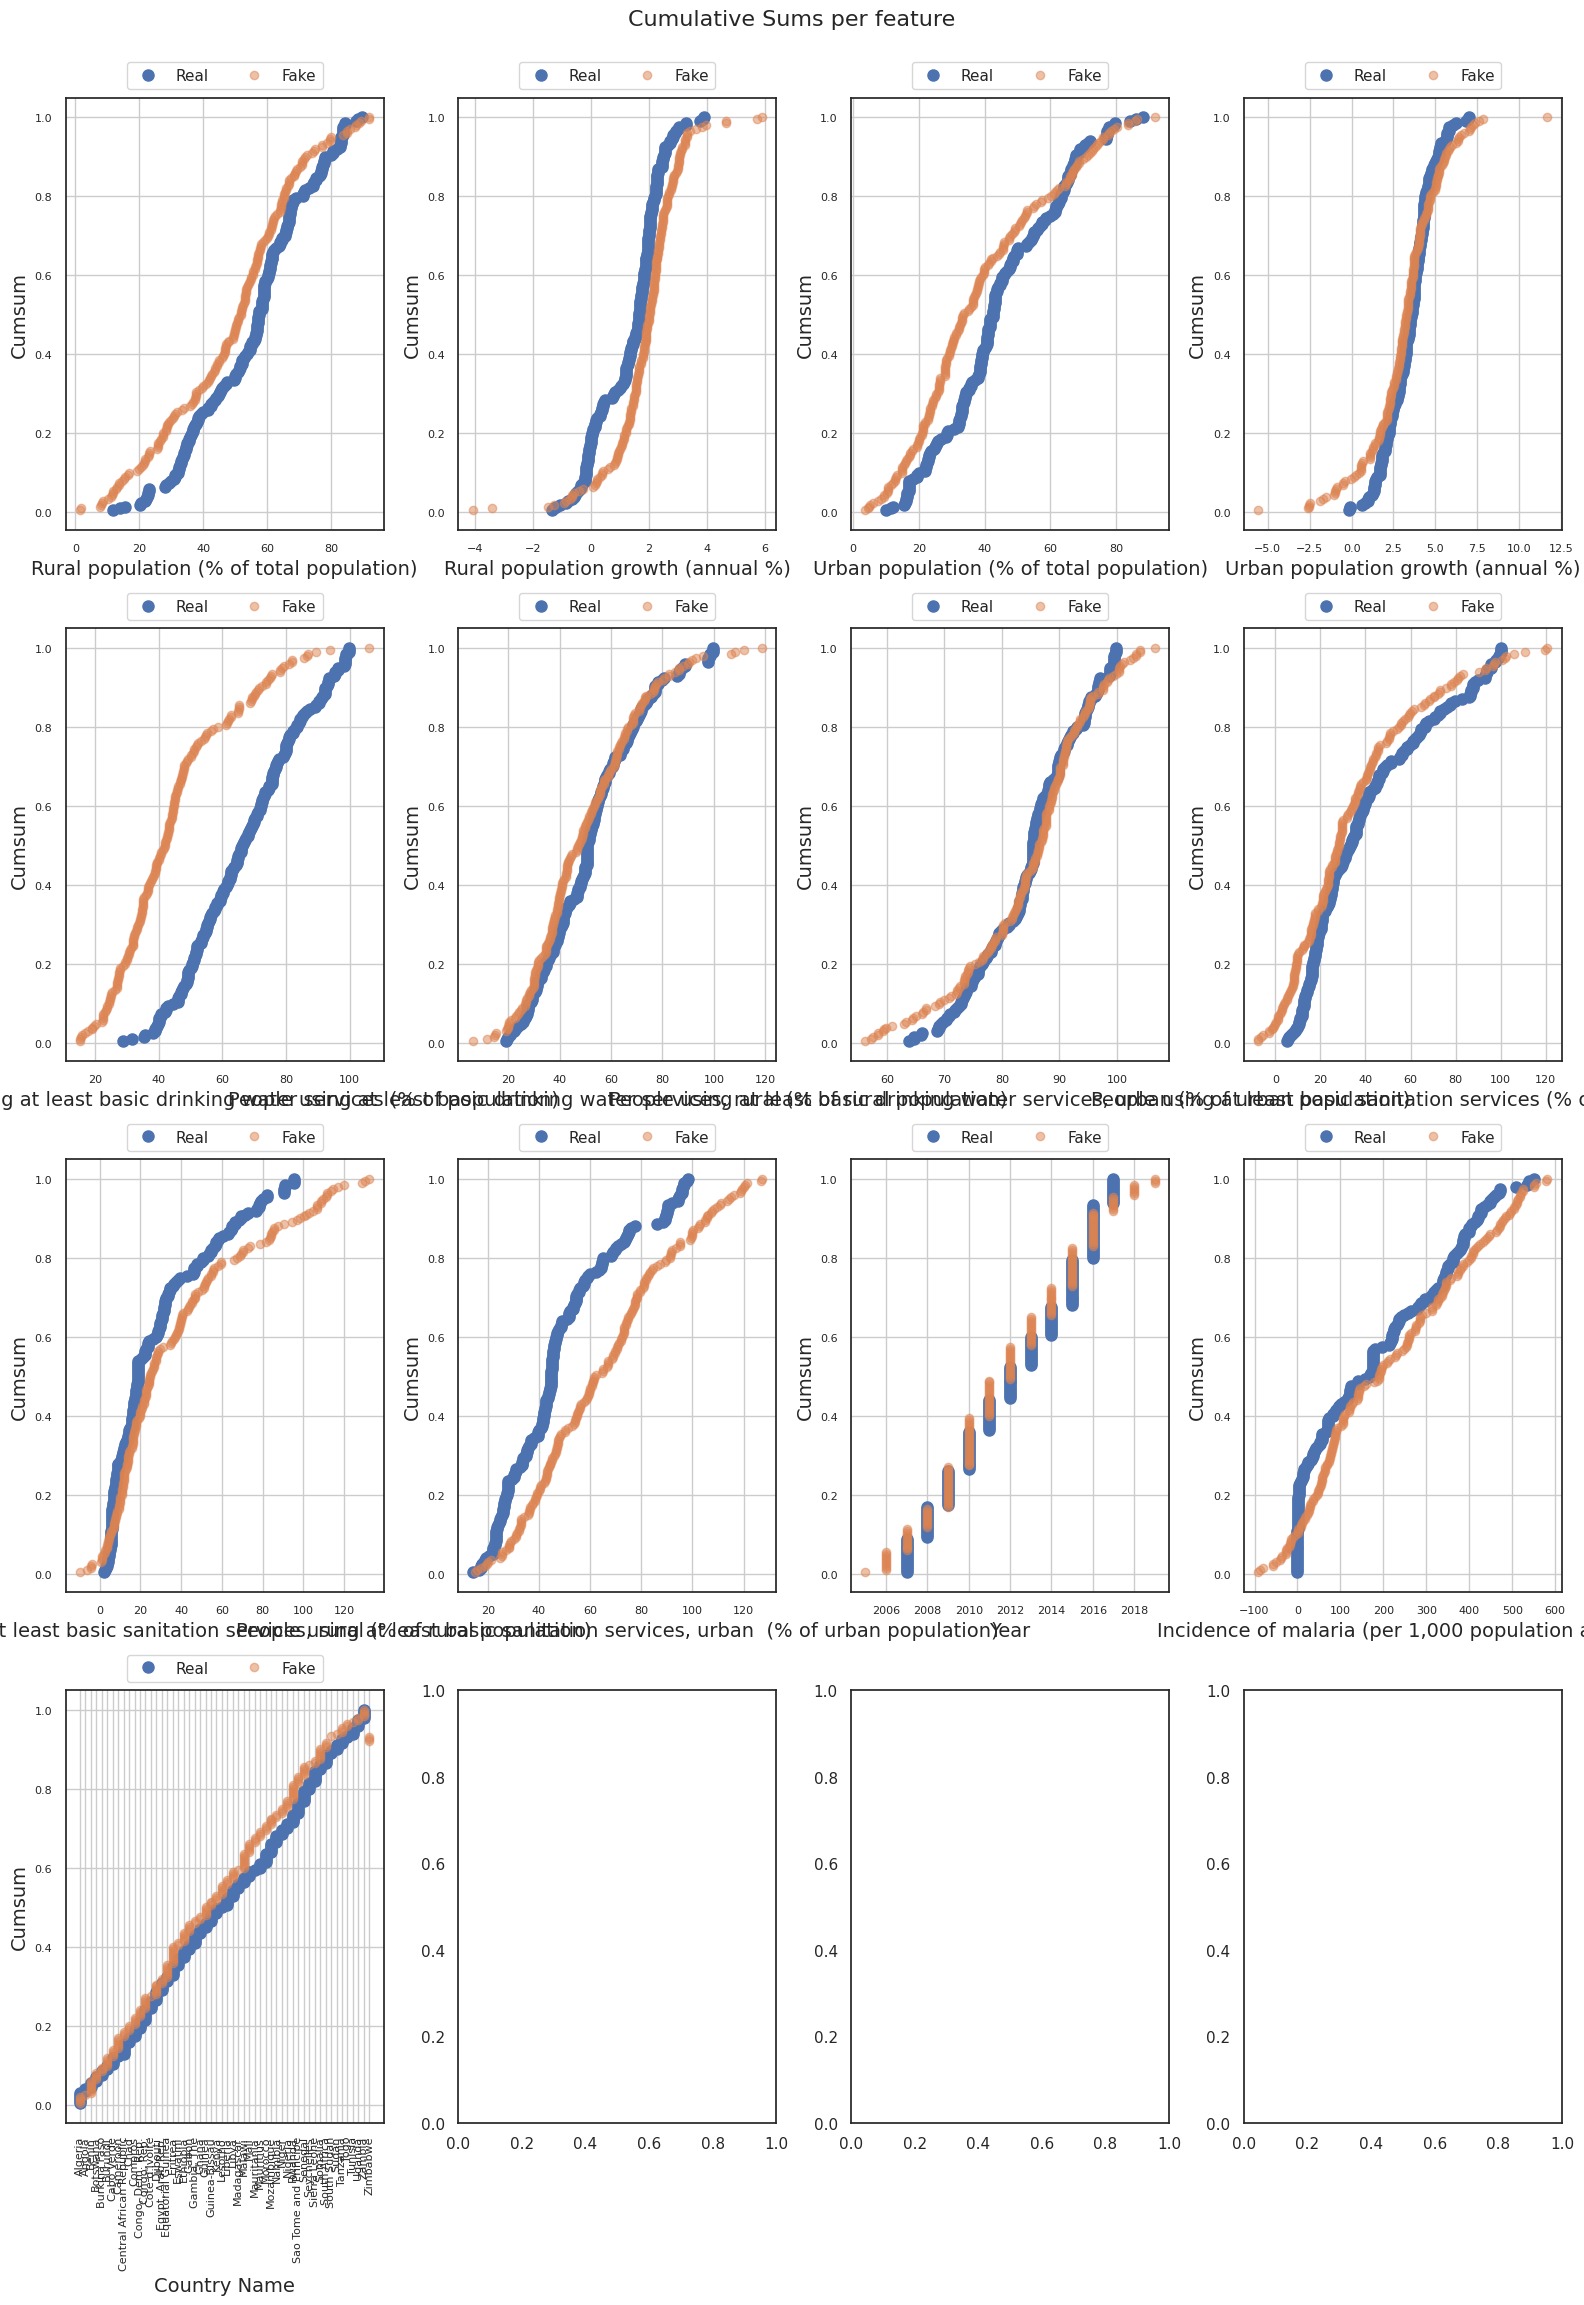

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


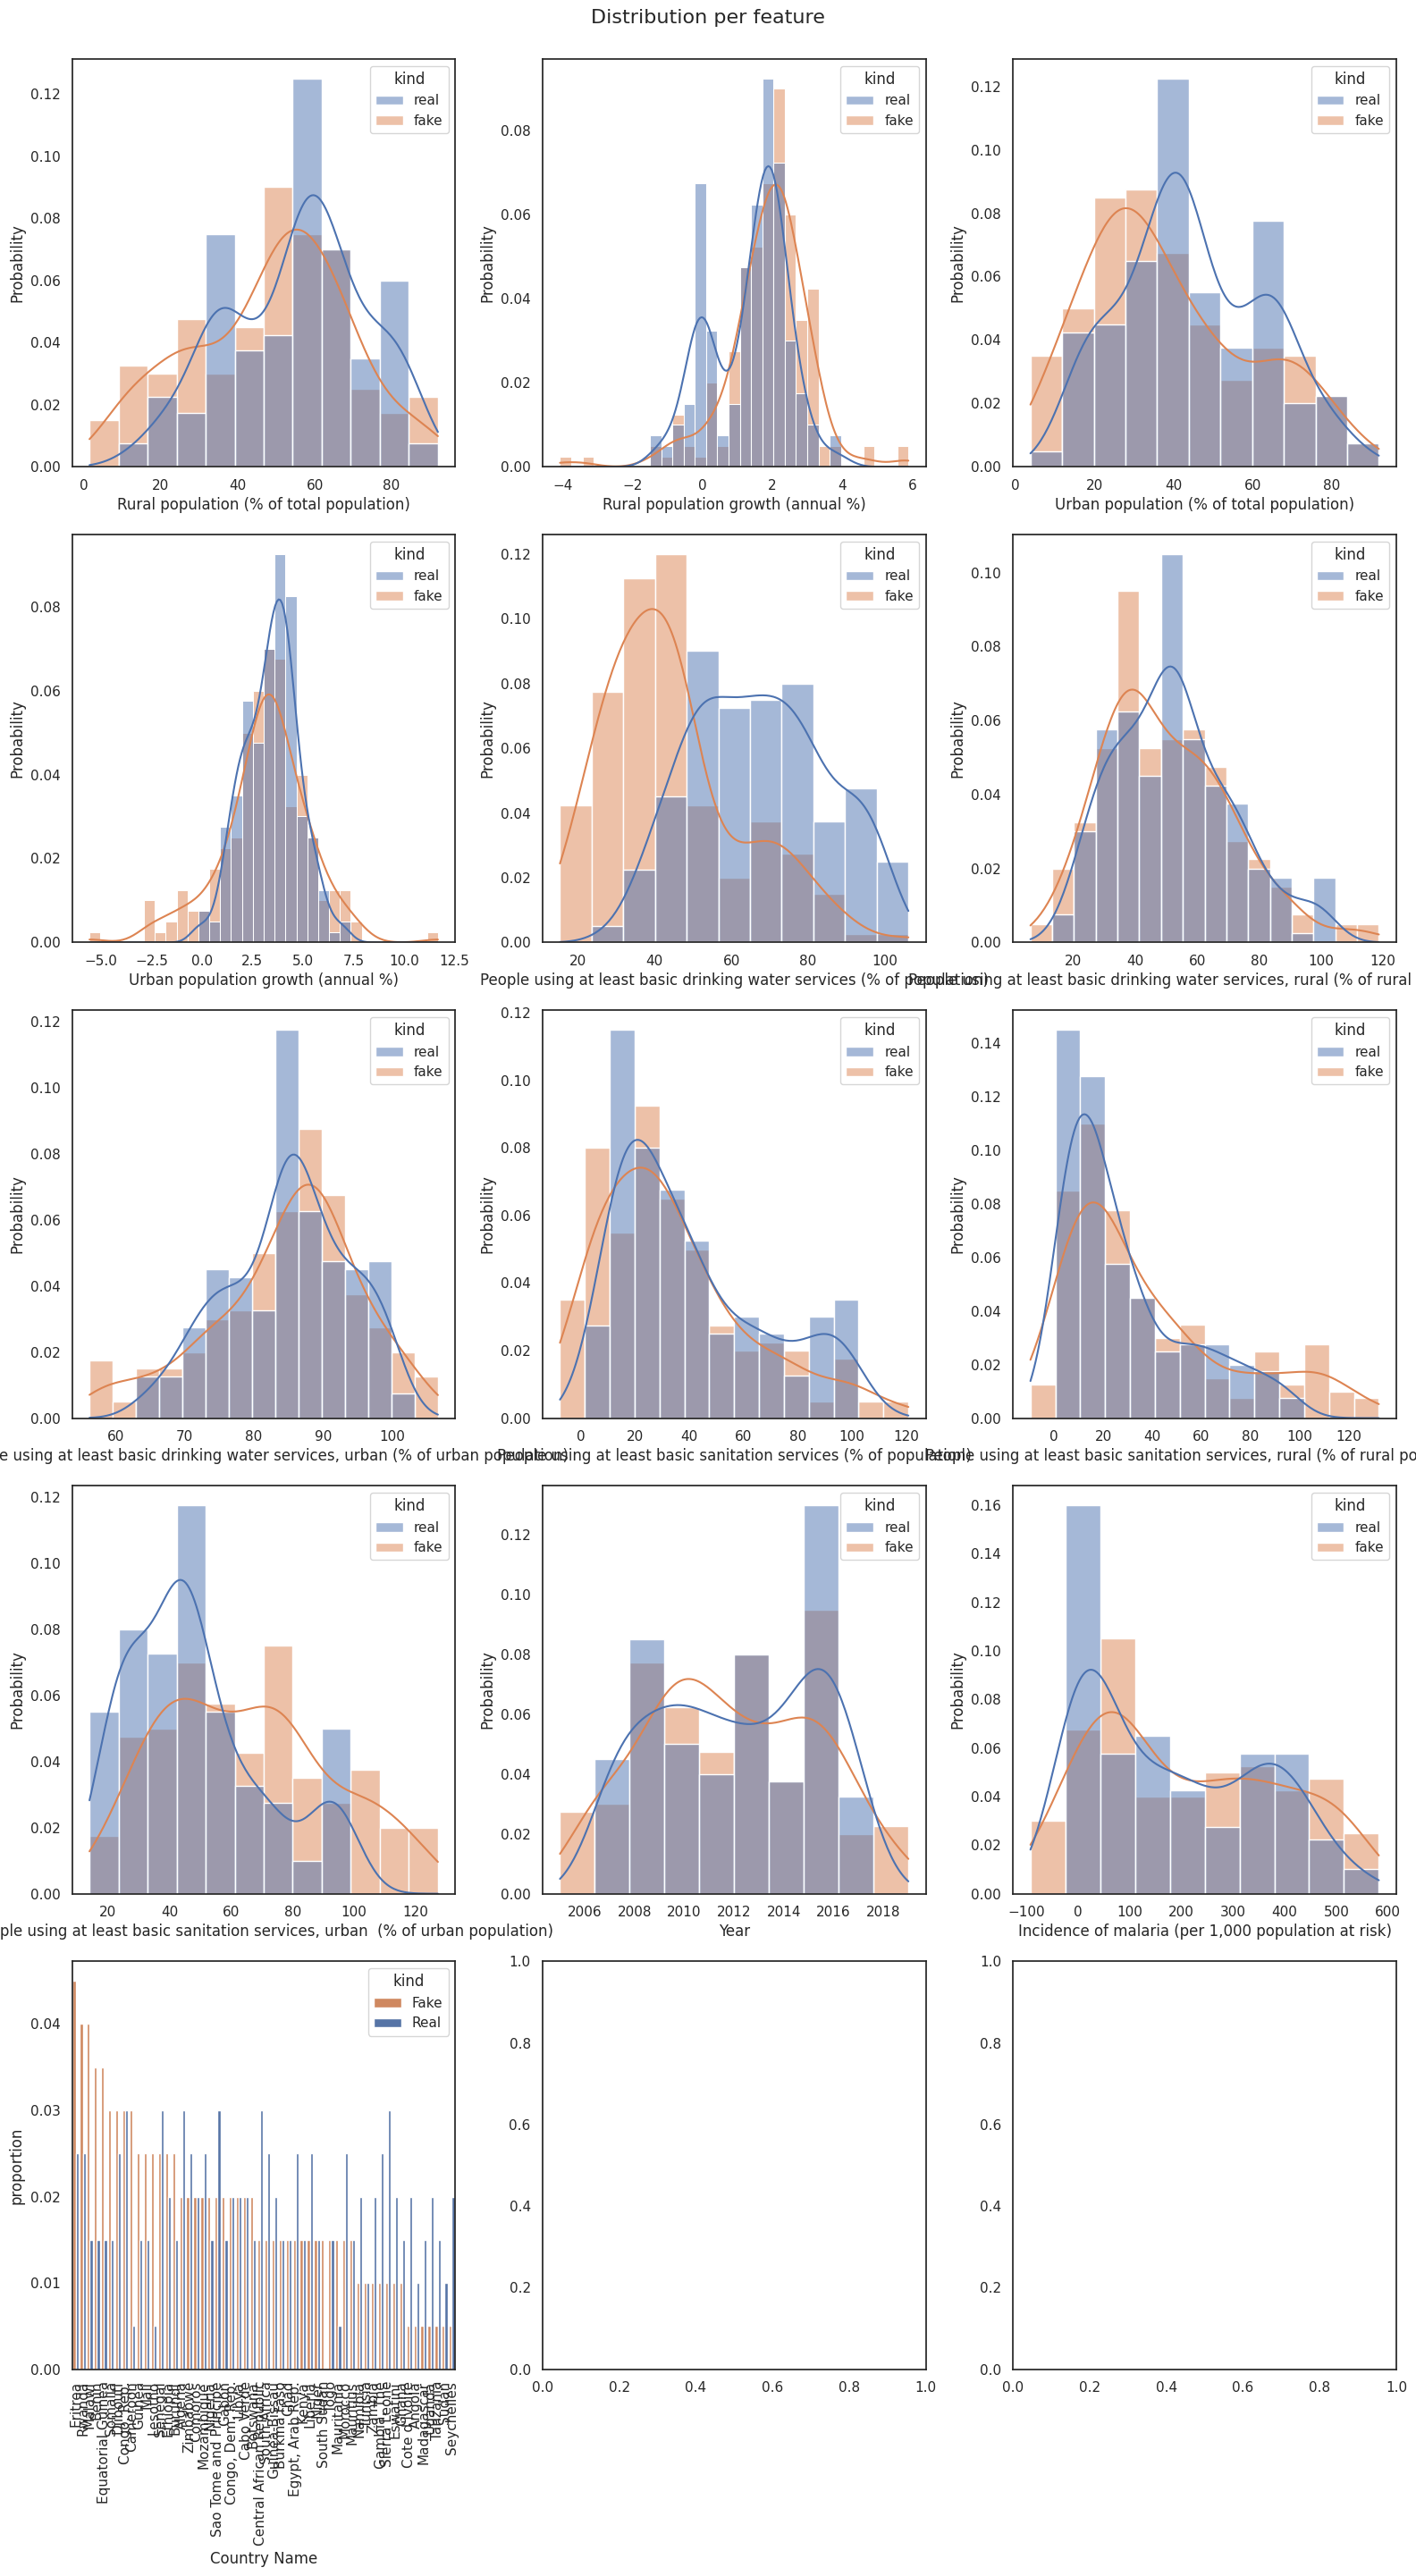

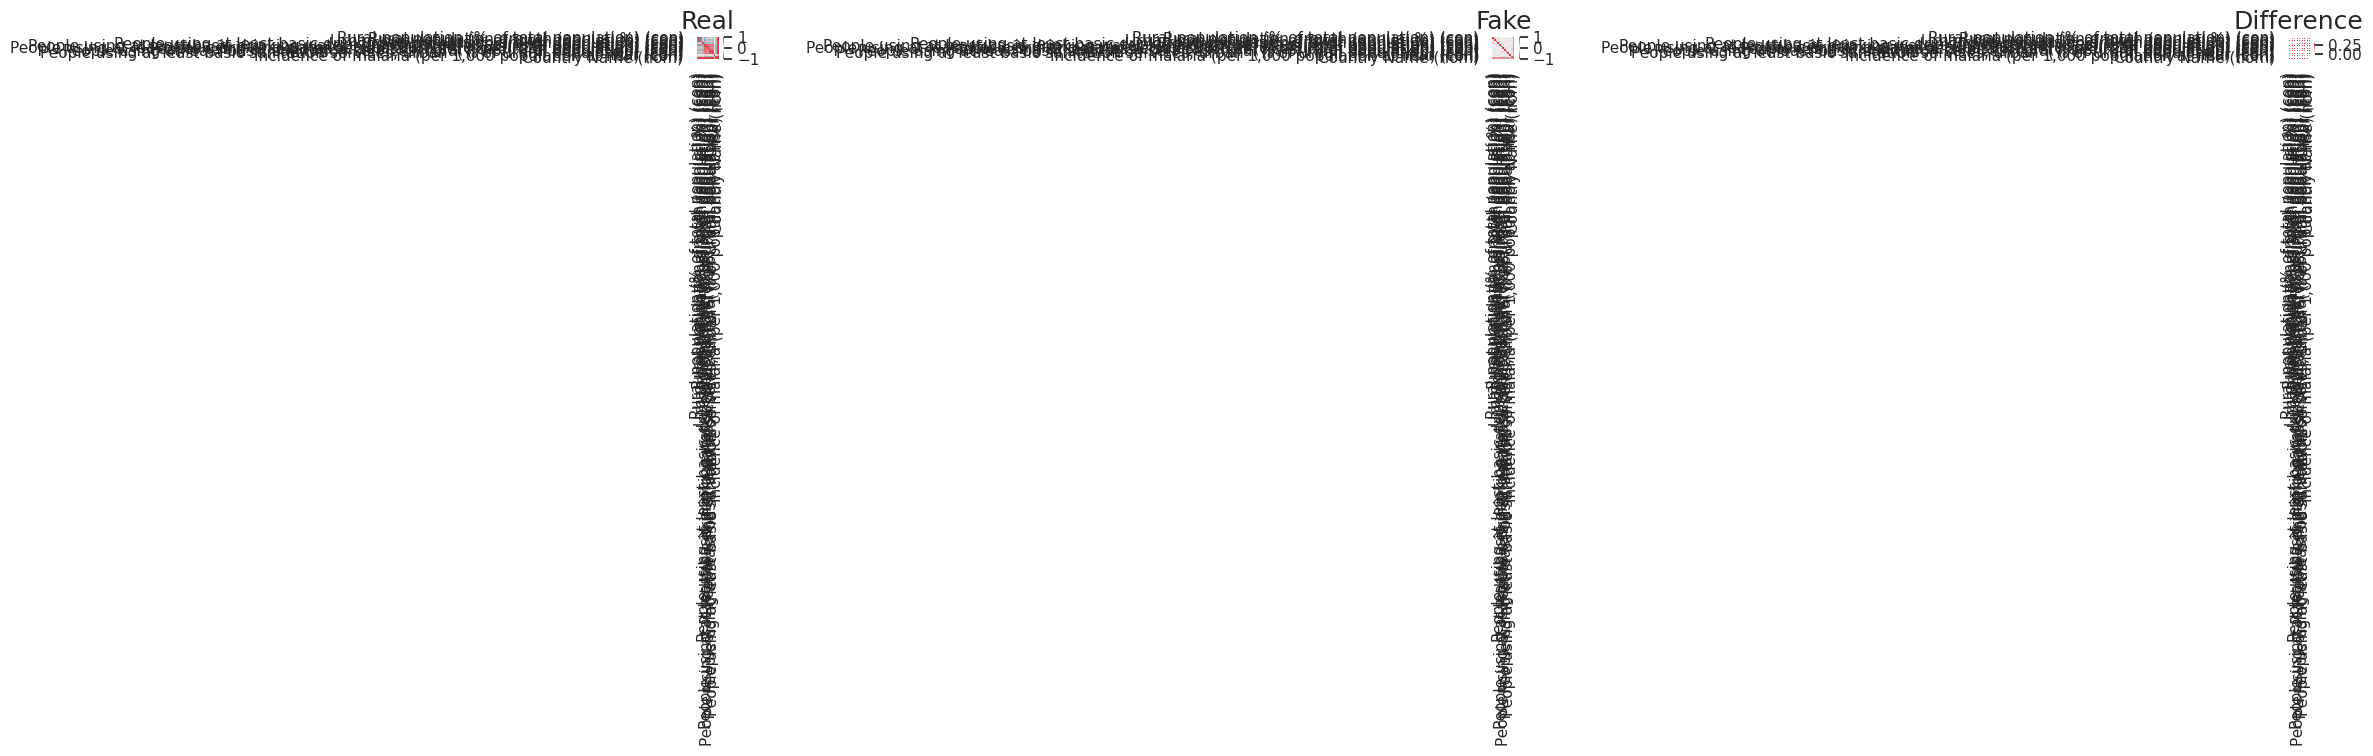

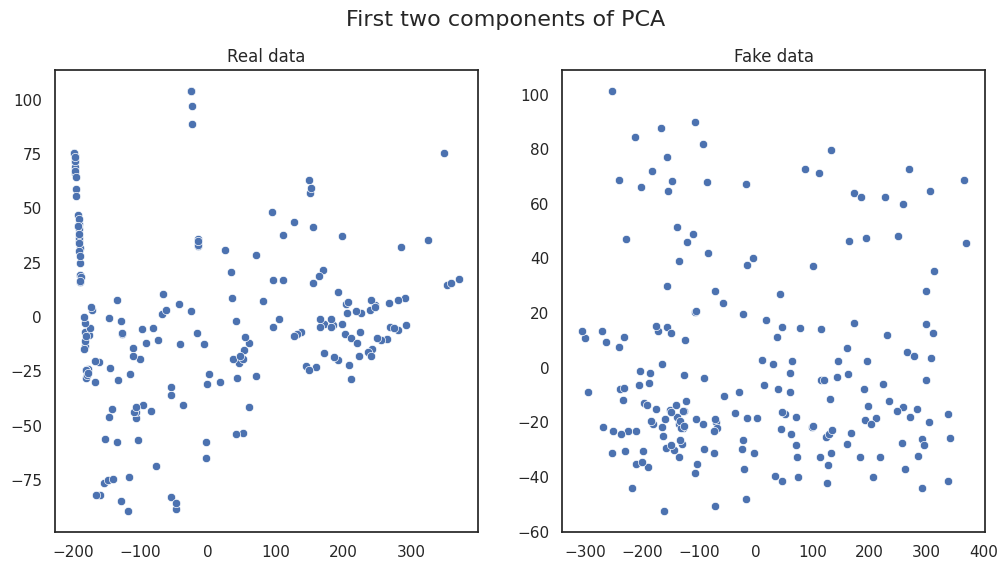

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
synth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            200 non-null    float64
 1   Rural population growth (annual %)                                                  200 non-null    float64
 2   Urban population (% of total population)                                            200 non-null    float64
 3   Urban population growth (annual %)                                                  200 non-null    float64
 4   People using at least basic drinking water services (% of population)               200 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  200 non-null   

In [ ]:
synth_data.describe()

Rural population (% of total population)  \
count                                200.000000   
mean                                  48.456514   
std                                   20.615720   
min                                    1.444552   
25%                                   31.736742   
50%                                   51.781170   
75%                                   62.557008   
max                                   92.029489   

       Rural population growth (annual %)  \
count                          200.000000   
mean                             1.869711   
std                              1.221284   
min                             -4.074260   
25%                              1.360017   
50%                              2.013492   
75%                              2.489653   
max                              5.890869   

       Urban population (% of total population)  \
count                                200.000000   
mean                                  38.758603   
std                                   20.853706   
min                                    3.715026   
25%                                   23.369576   
50%                                   33.621892   
75%                                   52.489277   
max                                   91.830918   

       Urban population growth (annual %)  \
count                          200.000000   
mean                             3.139330   
std                              2.214406   
min                             -5.571095   
25%                              2.136380   
50%                              3.301956   
75%                              4.416493   
max                             11.684549   

       People using at least basic drinking water services (% of population)  \
count                                         200.000000                       
mean                                           44.347343                       
std                                            17.914933                       
min                                            15.281617                       
25%                                            31.944961                       
50%                                            41.945794                       
75%                                            51.949542                       
max                                           106.206087                       

       People using at least basic drinking water services, rural (% of rural population)  \
count                                         200.000000                                    
mean                                           50.046090                                    
std                                            20.645296                                    
min                                             6.087081                                    
25%                                            35.450873                                    
50%                                            47.325528                                    
75%                                            63.282455                                    
max                                           118.758929                                    

       People using at least basic drinking water services, urban (% of urban population)  \
count                                         200.000000                                    
mean                                           84.590792                                    
std                                            10.771093                                    
min                                            56.249268                                    
25%                                            78.338520                                    
50%                                            86.477063                                    
75%                                            91.119505         

In [ ]:
# Merge the real and generated data to create a new train dataset
merged_train = pd.concat([data_train, synth_data], ignore_index=True)

In [ ]:
merged_train

Rural population (% of total population)  \
0                                   67.010000   
1                                   71.220000   
2                                   60.280000   
3                                   76.700000   
4                                   58.445000   
..                                        ...   
670                                 13.112600   
671                                 19.386201   
672                                 78.805001   
673                                 35.951739   
674                                 56.301876   

     Rural population growth (annual %)  \
0                              2.050000   
1                              2.040000   
2                              1.880000   
3                              0.620000   
4                              1.675000   
..                                  ...   
670                           -0.597925   
671                            2.456739   
672                            3.124162   
673                            1.554475   
674                            0.577344   

     Urban population (% of total population)  \
0                                   32.990000   
1                                   28.780000   
2                                   39.720000   
3                                   23.300000   
4                                   41.560000   
..                                        ...   
670                                 26.146378   
671                                 50.343975   
672                                 26.214098   
673                                 38.426171   
674                                 19.875491   

     Urban population growth (annual %)  \
0                              2.390000   
1                              2.850000   
2                              3.510000   
3                              1.470000   
4                              3.730000   
..                                  ...   
670                           -0.915217   
671                            5.191466   
672                            4.688920   
673                            4.567607   
674                            3.027060   

     People using at least basic drinking water services (% of population)  \
0                                            50.460000                       
1                                            80.170000                       
2                                            60.890000                       
3                                            67.940000                       
4                                            50.330000                       
..                                                 ...                       
670                                          44.772625                       
671                                          22.245812                       
672                                          44.553812                       
673                                          36.692885                       
674                                          38.369553                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            42.760000                                    
1                                            76.910000                                    
2                                            48.320000                                    
3                                            59.370000                                    
4                                            27.800000                                    
..                                                 ...                                    
670                                          11.656634                                    
671                                          60.118485                                    
672                                  

In [ ]:
# Shuffle the dataset
merged_train = merged_train.sample(frac = 1).reset_index(drop=True)
merged_train

Rural population (% of total population)  \
0                                   77.154110   
1                                   74.690000   
2                                   44.247029   
3                                   41.420000   
4                                   83.070000   
..                                        ...   
670                                 76.430000   
671                                 80.199710   
672                                 62.360000   
673                                 78.020000   
674                                 67.700000   

     Rural population growth (annual %)  \
0                              0.885740   
1                             -0.270000   
2                              1.020039   
3                              0.000000   
4                              2.580000   
..                                  ...   
670                            2.220000   
671                            1.189545   
672                            0.190000   
673                            3.270000   
674                            1.680000   

     Urban population (% of total population)  \
0                                   76.035841   
1                                   25.310000   
2                                   31.992726   
3                                   58.580000   
4                                   16.930000   
..                                        ...   
670                                 23.570000   
671                                 14.758376   
672                                 37.650000   
673                                 21.990000   
674                                 32.300000   

     Urban population growth (annual %)  \
0                              3.371105   
1                              2.450000   
2                              2.812779   
3                              2.310000   
4                              2.610000   
..                                  ...   
670                            4.380000   
671                            5.495784   
672                            7.210000   
673                            3.570000   
674                            1.270000   

     People using at least basic drinking water services (% of population)  \
0                                            47.607434                       
1                                            68.070000                       
2                                            43.212653                       
3                                            78.960000                       
4                                            52.750000                       
..                                                 ...                       
670                                          54.340000                       
671                                          54.121483                       
672                                          37.640000                       
673                                          39.820000                       
674                                          64.510000                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            54.487131                                    
1                                            61.000000                                    
2                                            40.091982                                    
3                                            56.040000                                    
4                                            47.720000                                    
..                                                 ...                                    
670                                          44.570000                                    
671                                          39.397435                                    
672                                  

In [ ]:
merged_train.columns

Index(['Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Country Name'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
le = LabelEncoder()
merged_train['Encoded Country'] = le.fit_transform(merged_train['Country Name'])

In [ ]:
merged_train['Encoded Country']

0      40
1      26
2      45
3      34
4      39
       ..
670    25
671    32
672    44
673     9
674    53
Name: Encoded Country, Length: 675, dtype: int64

In [ ]:
X_merged_train = merged_train.drop(columns=['Country Name', 'Encoded Country'])
y_merged_train = merged_train['Encoded Country']

In [ ]:
clf = LogisticRegression(random_state=42).fit(X_merged_train, y_merged_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
features

['Rural population (% of total population)',
 'Rural population growth (annual %)',
 'Urban population (% of total population)',
 'Urban population growth (annual %)',
 'People using at least basic drinking water services (% of population)',
 'People using at least basic drinking water services, rural (% of rural population)',
 'People using at least basic drinking water services, urban (% of urban population)',
 'People using at least basic sanitation services (% of population)',
 'People using at least basic sanitation services, rural (% of rural population)',
 'People using at least basic sanitation services, urban  (% of urban population)',
 'latitude',
 'longitude',
 'Country Name',
 'Year']

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred_lbl = le.inverse_transform(y_pred)

In [ ]:
print(classification_report(y_test, y_pred_lbl, zero_division=0))

                          precision    recall  f1-score   support

                 Algeria       0.25      1.00      0.40         1
                  Angola       1.00      0.50      0.67         4
                   Benin       0.00      0.00      0.00         4
                Botswana       1.00      1.00      1.00         1
            Burkina Faso       0.00      0.00      0.00         2
                 Burundi       0.50      1.00      0.67         1
              Cabo Verde       0.00      0.00      0.00         3
                Cameroon       1.00      1.00      1.00         1
Central African Republic       1.00      1.00      1.00         1
                    Chad       0.25      1.00      0.40         1
                 Comoros       1.00      1.00      1.00         4
        Congo, Dem. Rep.       1.00      0.33      0.50         3
             Congo, Rep.       0.50      1.00      0.67         1
                Djibouti       0.57      1.00      0.73         4
        E

# Deploying Model

In [ ]:
import pickle

In [ ]:
#saving malaria model using pickle
with open('clf_model.pkl','wb') as file:
  pickle.dump(clf,file)

with open('label_encoder.pkl','wb') as file:
  pickle.dump(le,file)
